In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Conv2D, Flatten, Reshape, Conv1D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

import data_processing
import feature_extraction

In [2]:
df = data_processing.read_all_users('geolife_trajectories')
df = data_processing.process_classes(df)
df = data_processing.drop_unlabelled(df)

[1/182] processing user 135
[2/182] processing user 132
[3/182] processing user 104
[4/182] processing user 103
[5/182] processing user 168
[6/182] processing user 157
[7/182] processing user 150
[8/182] processing user 159
[9/182] processing user 166
[10/182] processing user 161
[11/182] processing user 102
[12/182] processing user 105
[13/182] processing user 133
[14/182] processing user 134
[15/182] processing user 160
[16/182] processing user 158
[17/182] processing user 167
[18/182] processing user 151
[19/182] processing user 169
[20/182] processing user 156
[21/182] processing user 024
[22/182] processing user 023
[23/182] processing user 015
[24/182] processing user 012
[25/182] processing user 079
[26/182] processing user 046
[27/182] processing user 041
[28/182] processing user 048
[29/182] processing user 077
[30/182] processing user 083
[31/182] processing user 084
[32/182] processing user 070
[33/182] processing user 013
[34/182] processing user 014
[35/182] processing use

In [3]:
#df = data_processing.read_all_users('Geolife_data')
df = data_processing.calculations(df)

In [4]:
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
2,39.975983,116.330467,114.829396,39184.431563,2007-04-12 10:21:27,20070412101853.plt,bike,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39.976100,116.330500,118.110236,39184.431863,2007-04-12 10:21:53,20070412101853.plt,bike,161,0.013280,0.000511,26.0,NaN,12.349827,NaN,NaN,NaN,NaN
4,39.976233,116.330567,118.110236,39184.432813,2007-04-12 10:23:15,20070412101853.plt,walk,161,0.015877,0.000194,82.0,-0.000004,20.964607,8.614780,1.637976,0.105058,NaN
0,39.976467,116.330067,173.884514,39184.431435,2007-04-12 10:21:16,20070412102116.plt,bike,163,0.049883,-0.000419,-119.0,0.000005,301.340706,280.376099,-1.461899,-2.356102,0.020682
1,39.976400,116.330150,173.884514,39184.431505,2007-04-12 10:21:22,20070412102116.plt,bike,163,0.010265,0.001711,6.0,0.000355,136.232213,165.108493,1.245015,-27.518082,-4.193663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,0.000994,0.000199,5.0,-0.000013,89.999996,16.175060,0.338707,3.235012,-0.347141
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,0.001291,0.000258,5.0,0.000012,81.748068,8.251929,0.230275,-1.650386,-0.977080
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,0.001873,0.000375,5.0,0.000023,332.943923,251.195856,0.310568,50.239171,10.377911
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,0.001479,0.000296,5.0,-0.000016,331.310690,1.633234,0.266475,-0.326647,-10.113164


In [4]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
0,39.976467,116.330067,173.884514,39184.431435,2007-04-12 10:21:16,20070412102116.plt,bike,163,0.049883,-0.000419,-119.0,5.149661e-06,301.340706,280.376099,-1.461899,-2.356102,0.020682
1,39.976400,116.330150,173.884514,39184.431505,2007-04-12 10:21:22,20070412102116.plt,bike,163,0.010265,0.001711,6.0,3.550084e-04,136.232213,165.108493,1.245015,-27.518082,-4.193663
2,39.976250,116.330267,173.884514,39184.431748,2007-04-12 10:21:43,20070412102116.plt,bike,163,0.019417,0.000925,21.0,-3.744000e-05,149.204222,12.972009,0.850336,0.617715,1.339800
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,0.011390,0.000113,101.0,-8.038106e-06,119.216746,29.987477,7.198863,-0.296906,-0.009056
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,0.018587,0.000177,105.0,6.118362e-07,184.382087,65.165341,0.362918,0.620622,0.008738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,0.000994,0.000199,5.0,-1.346552e-05,89.999996,16.175060,0.338707,3.235012,-0.347141
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,0.001291,0.000258,5.0,1.189351e-05,81.748068,8.251929,0.230275,-1.650386,-0.977080
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,0.001873,0.000375,5.0,2.326641e-05,332.943923,251.195856,0.310568,50.239171,10.377911
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,0.001479,0.000296,5.0,-1.576277e-05,331.310690,1.633234,0.266475,-0.326647,-10.113164


Select features for time-series analysis

In [5]:
time_series_features = ['speed', 'acceleration', 'angular_acceleration']

Normalize Time-Series features

In [6]:
scaler = StandardScaler()
df[time_series_features] = scaler.fit_transform(df[time_series_features])
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
0,39.976467,116.330067,173.884514,39184.431435,2007-04-12 10:21:16,20070412102116.plt,bike,163,0.049883,-0.129757,-119.0,-0.000219,301.340706,280.376099,-1.461899,-2.356102,-0.009164
1,39.976400,116.330150,173.884514,39184.431505,2007-04-12 10:21:22,20070412102116.plt,bike,163,0.010265,-0.096464,6.0,0.008936,136.232213,165.108493,1.245015,-27.518082,-0.075037
2,39.976250,116.330267,173.884514,39184.431748,2007-04-12 10:21:43,20070412102116.plt,bike,163,0.019417,-0.108753,21.0,-0.001334,149.204222,12.972009,0.850336,0.617715,0.011454
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,0.011390,-0.121442,101.0,-0.000564,119.216746,29.987477,7.198863,-0.296906,-0.009629
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,0.018587,-0.120438,105.0,-0.000338,184.382087,65.165341,0.362918,0.620622,-0.009351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,0.000994,-0.120098,5.0,-0.000706,89.999996,16.175060,0.338707,3.235012,-0.014914
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,0.001291,-0.119169,5.0,-0.000043,81.748068,8.251929,0.230275,-1.650386,-0.024760
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,0.001873,-0.117351,5.0,0.000255,332.943923,251.195856,0.310568,50.239171,0.152726
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,0.001479,-0.118582,5.0,-0.000766,331.310690,1.633234,0.266475,-0.326647,-0.167563


Encode Labels

In [7]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

Put into segments

In [8]:
df = data_processing.create_segments(df)
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,segment
0,39.976467,116.330067,173.884514,39184.431435,2007-04-12 10:21:16,20070412102116.plt,0,163,0.049883,-0.129757,-119.0,-0.000219,301.340706,280.376099,-1.461899,-2.356102,-0.009164,1
1,39.976400,116.330150,173.884514,39184.431505,2007-04-12 10:21:22,20070412102116.plt,0,163,0.010265,-0.096464,6.0,0.008936,136.232213,165.108493,1.245015,-27.518082,-0.075037,1
2,39.976250,116.330267,173.884514,39184.431748,2007-04-12 10:21:43,20070412102116.plt,0,163,0.019417,-0.108753,21.0,-0.001334,149.204222,12.972009,0.850336,0.617715,0.011454,1
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,0,163,0.011390,-0.121442,101.0,-0.000564,119.216746,29.987477,7.198863,-0.296906,-0.009629,1
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,0,163,0.018587,-0.120438,105.0,-0.000338,184.382087,65.165341,0.362918,0.620622,-0.009351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,4,102,0.000994,-0.120098,5.0,-0.000706,89.999996,16.175060,0.338707,3.235012,-0.014914,8294
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,4,102,0.001291,-0.119169,5.0,-0.000043,81.748068,8.251929,0.230275,-1.650386,-0.024760,8294
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,4,102,0.001873,-0.117351,5.0,0.000255,332.943923,251.195856,0.310568,50.239171,0.152726,8294
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,4,102,0.001479,-0.118582,5.0,-0.000766,331.310690,1.633234,0.266475,-0.326647,-0.167563,8294


Group by trajectory to create sequence PROBLEM -> nicht jede trajectory hat das gleiche label!

In [23]:
X_sequences = []
y_sequences = []

for _, group in df.groupby('segment'):
    X_sequences.append(group[time_series_features].values)  # Raw sequences
    y_sequences.append(group['label'].iloc[0])  # Assign one label per segment

In [24]:
size = len(X_sequences)
print(size) 

8294


Plot the trajectory length

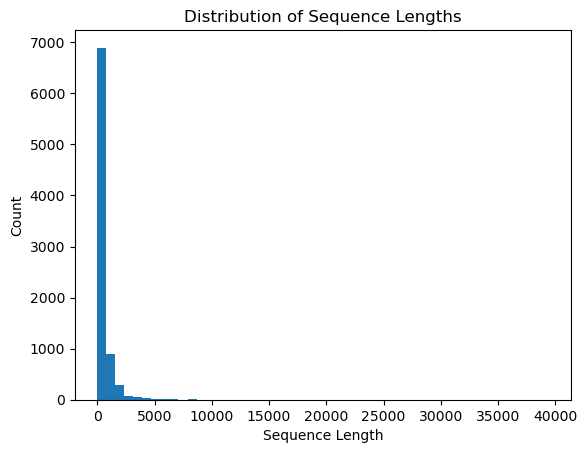

In [25]:
import matplotlib.pyplot as plt
import numpy as np

seq_lengths = [len(seq) for seq in X_sequences]
plt.hist(seq_lengths, bins=50)
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.title("Distribution of Sequence Lengths")
plt.show()

Set max lenght because of imbalances trajectory lengths

Create Rolling Window

In [12]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def create_rolling_windows(X_sequences, y_sequences, window_size=200, step=10):
    """
    Creates rolling window segments from time-series data.
    
    Parameters:
    - X_sequences: List of time-series feature sequences (NumPy arrays)
    - y_sequences: List of corresponding labels
    - window_size: Number of time steps per window
    - step: Step size between windows (e.g., 10 for overlap)
    
    Returns:
    - X_windows: NumPy array of rolling window samples
    - y_windows: NumPy array of labels
    """
    X_windows = []
    y_windows = []

    for i in range(len(X_sequences)):  # Loop through trajectories
        seq = X_sequences[i]  # Extract single trajectory
        label = y_sequences[i]  # Corresponding label
        
        # Create rolling windows within the trajectory
        for j in range(0, len(seq) - window_size + 1, step):
            X_windows.append(seq[j:j + window_size])  # Extract window
            y_windows.append(label)  # Use the same label for entire window

    return np.array(X_windows), np.array(y_windows)


In [13]:
# Set parameters
window_size = 100  # Length of each segment
step_size = 5  # Step between windows

# Create rolling windows
X_windows, y_windows = create_rolling_windows(X_sequences, y_sequences, window_size, step_size)

# Convert labels to one-hot encoding
y_onehot_seq = to_categorical(y_windows)

# Verify shape
print("Shape of X_windows:", X_windows.shape)
print("Shape of y_onehot_seq:", y_onehot_seq.shape)

Shape of X_windows: (769189, 100, 3)
Shape of y_onehot_seq: (769189, 5)


In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Apply padding
X_padded = pad_sequences(X_windows, 
                         maxlen=window_size, 
                         padding='post', 
                         dtype='float32')

# Verify shape
print("Final Shape of X_padded:", X_padded.shape)


NameError: name 'X_windows' is not defined

Ausklammern?

In [26]:
maxlen=100 #hier anpassen
X_padded = pad_sequences(X_sequences[3:], 
                         maxlen=maxlen, 
                         padding='post', 
                         dtype='float32')
 # Convert labels to one-hot encoding
y_onehot_seq = to_categorical(y_sequences[3:]) 
y_onehot_seq.shape


(8291, 5)

Train/Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_onehot_seq, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)  # (num_samples, time_steps, num_features)
print("Shape of y_train:", y_train.shape)  # (num_samples, num_classes)

Shape of X_train: (6632, 100, 3)
Shape of y_train: (6632, 5)


Set up the model

In [38]:
def create_lstm_model(input_shape, num_classes):
    model = Sequential()

    # Masking layer to ignore padded values
    #model.add(Masking(mask_value=0.0, input_shape=input_shape))

    # LSTM Layers
    model.add(LSTM(128, activation='tanh', return_sequences=True))
    model.add(Dropout(0.3))
    
    model.add(LSTM(64, activation='tanh'))
    model.add(Dropout(0.3))

    # Fully connected layer
    model.add(Dense(64, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Initialize the model

In [39]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model = create_lstm_model(input_shape, num_classes)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.4686 - loss: 1.4019 - val_accuracy: 0.5882 - val_loss: 1.1288
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - accuracy: 0.5329 - loss: 1.2043 - val_accuracy: 0.6060 - val_loss: 1.0263
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.5494 - loss: 1.1283 - val_accuracy: 0.6074 - val_loss: 1.0337
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.5860 - loss: 1.0485 - val_accuracy: 0.5431 - val_loss: 1.0233
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - accuracy: 0.5817 - loss: 1.0628 - val_accuracy: 0.5663 - val_loss: 1.0301
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step - accuracy: 0.5688 - loss: 1.0238 - val_accuracy: 0.6060 - val_loss: 1.0196
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.5777 - loss: 1.0140 - val_accuracy: 0.6074 - val_loss: 1.0113
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.5752 - loss: 1.0750 - val_accu

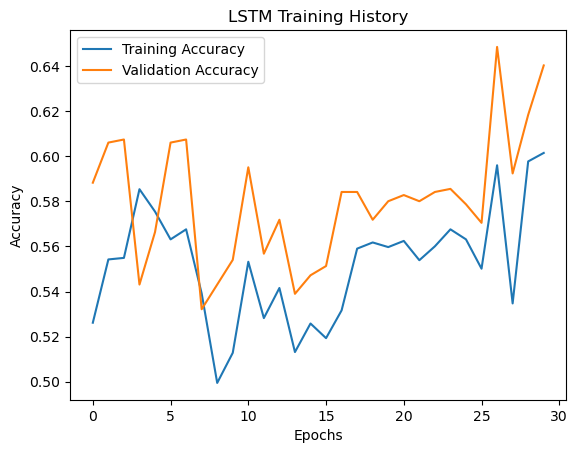

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50       144
           1       1.00      0.01      0.02        84
           2       0.55      0.87      0.67       125
           3       0.00      0.00      0.00        41
           4       0.69      0.88      0.77       337

    accuracy                           0.64       731
   macro avg       0.57      0.44      0.39       731
weighted avg       0.65      0.64      0.57       731



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


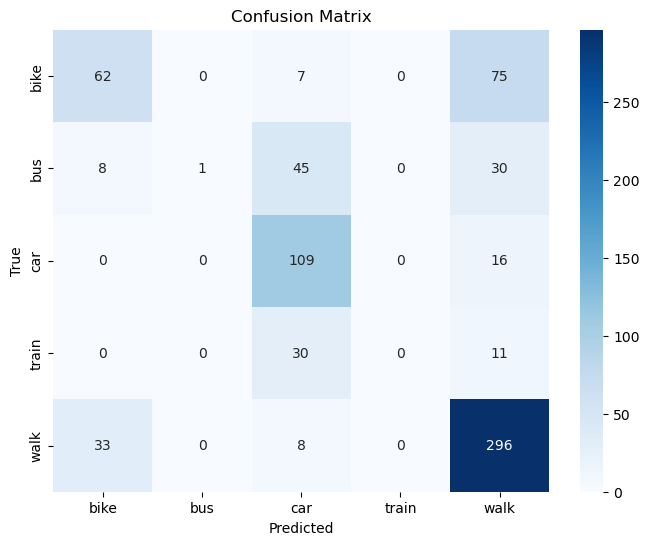

In [41]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Model with Conv2D Layer. Diqe 100 variabel machen!

In [28]:
def create_lstm_model(input_shape, num_classes):
    # Define Model
    model = Sequential()

    # 2D Convolution Layer
    model.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(100, 3, 1)))

    # Flatten before LSTM
    model.add(Flatten())  # Converts 2D to 1D for LSTM compatibility

    # LSTM Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    # Fully Connected Layer
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # 7-class classification

    # Compile the Model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [29]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model = create_lstm_model(input_shape, num_classes)

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 98, 3, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,204,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,214,981 (4.63 MB)

 Trainable params: 1,214,981 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[reduce_lr])

Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4053 - loss: 1.4396 - val_accuracy: 0.5320 - val_loss: 1.2124 - learning_rate: 0.0010
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5366 - loss: 1.1942 - val_accuracy: 0.5637 - val_loss: 1.1609 - learning_rate: 0.0010
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5900 - loss: 1.1004 - val_accuracy: 0.5893 - val_loss: 1.1169 - learning_rate: 0.0010
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6008 - loss: 1.0915 - val_accuracy: 0.5901 - val_loss: 1.1312 - learning_rate: 0.0010
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6353 - loss: 1.0235 - val_accuracy: 0.6270 - val_loss: 1.0681 - learning_rate: 0.0010
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6547 - loss: 0.9667 - val_accuracy: 0.6330 - val_loss: 1.0499 - learning_rate: 0.0010
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6795 - loss: 0.9302 - 

Plot

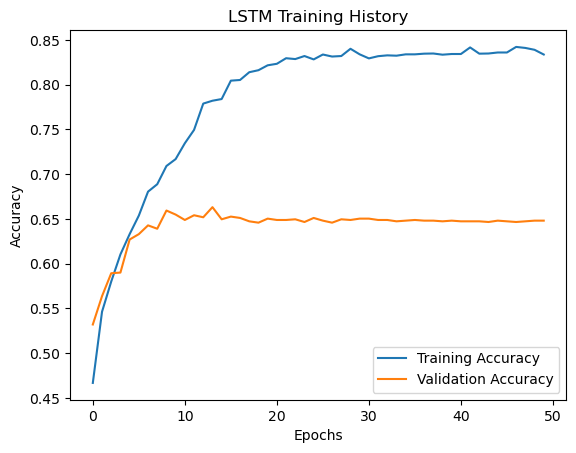

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.61       249
           1       0.49      0.53      0.51       297
           2       0.60      0.42      0.49       271
           3       0.56      0.46      0.51       138
           4       0.72      0.85      0.78       704

    accuracy                           0.64      1659
   macro avg       0.61      0.56      0.58      1659
weighted avg       0.64      0.64      0.64      1659



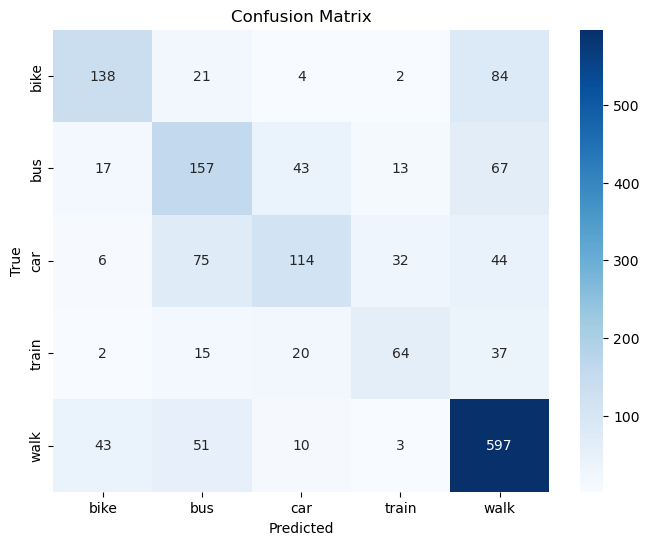

In [31]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()